<a href="https://colab.research.google.com/github/AmarSinghChouhan/Play-Store-review_Analysis/blob/main/a_Amar's_Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Introduction to PlayStore and Data 

*Play Store and formerly Android Market, is a digital distribution service operated and developed by Google.
It  has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.*

*Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.*

*Also, we will explore and analyze the data to discover key factors responsible for app engagement and success.*

 *In this notebook, we will do a comprehensive analysis of the Android app market and users review by comparing over ten thousand apps and reveiws repectively in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.*

  



# Importing libraries

In [ ]:
# Importing all the required library.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
color_red = '#4472c4'
color_blue = '#ed7d31'

#for making plot with seaborn
import seaborn as sns 
color = sns.color_palette()

# visualization tool
import plotly  
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go  

import plotly.express as px

# for visualization google colab
import plotly.io as iplot
iplot.renderers.default = 'colab'  

import warnings
warnings.filterwarnings('ignore')

# Mounting google Drive 

In [ ]:
# Mounting drive to get the data from the drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Analysing Dataset

In [ ]:
# Importing dataset
play_store = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
user_review = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [ ]:
# Exploring play store 
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Exploring user review data
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Playstore app data
print(f'The total number of rows and column in playstore is{play_store.shape}')
print(f'The total number of unique App in playstore is {play_store["App"].nunique()}')

The total number of rows and column in playstore is(10841, 13)
The total number of unique App in playstore is 9660


In [ ]:
# User review data
print(f'The total number of rows and column in playstore is{user_review.shape}')
print(f'The total number of unique App in playstore is {user_review["App"].nunique()}')

The total number of rows and column in playstore is(64295, 5)
The total number of unique App in playstore is 1074


In [ ]:
# Describe method gives us summary statistics for numerical columns in our DataFrame.
play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_review.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000



# Data Cleaning



## 1. Duplicate data



In [ ]:
#Copying the database for comparison after cleaning the data
play_store_original = play_store.copy()
play_store_original.shape

(10841, 13)

In [ ]:
#Let's only keep the unique data and remove the duplicate data from the app in column.
play_store.drop_duplicates(subset= 'App', inplace=True)

In [ ]:
print(f'The number of rows and columns in playstore before is {play_store_original.shape} and \n after cleaning the data by removing duplicates is{play_store.shape}')

The number of rows and columns in playstore before is (10841, 13) and 
 after cleaning the data by removing duplicates is(9660, 13)


## 2. Conversion of column for analysis

 

In [ ]:
##(SIZE)
#As some of the values are non-numerical value so let's convert the categorical variables the into numerical.
play_store['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [ ]:
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [ ]:
## (INSTALLS)
play_store['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [ ]:
## Drop the row that has incorrect values for our features
play_store = play_store[~(play_store['Installs'] == "Free")].reset_index(drop=True)

In [ ]:

play_store['Installs'] = play_store['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_store['Installs'] = play_store['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_store['Installs'] = play_store['Installs'].apply(lambda x: int(x))

In [ ]:
play_store['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
play_store['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
## Remove "$" from "Price" columns to make it numeric
play_store['Price'] = play_store['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))


In [ ]:
play_store['Price'].unique()

array(['0.0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.0', '5.49', '10.0',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.0', '29.99',
       '12.99', '2.49', '10.99', '1.5', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.7', '8.99', '2.0', '3.88',
       '25.99', '399.99', '17.99', '400.0', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.5', '1.59', '6.49', '1.29', '5.0', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.9', '8.49',
       '1.75', '14.0', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.8', '1.96', '19.4', '3.9', '4.59', '15.46', '3.04',
       '4.29', '2.6', '3.28', '4.6', '28.99', '2.95', '2.9', '1.97',
       '200.0', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.2',
       '1.04'], dtype=object)

In [ ]:

## Convert the column types to numeric values
play_store['Size'] = play_store['Size'].apply(lambda x: float(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x: float(x))
play_store['Price'] = play_store['Price'].apply(lambda x: float(x))
play_store['Reviews'] = play_store['Reviews'].apply(lambda x: int(x))

In [ ]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Null values

In [ ]:
## Let's get the ratio of missing values for each feature
play_store_na = (play_store.isnull().sum() / len(play_store)) * 100
play_store_na = play_store_na.drop(play_store_na[play_store_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_na})
missing_data

,Missing Ratio
Rating,15.146495
Size,12.703178
Current Ver,0.082824
Android Ver,0.020706
Type,0.010353


In [ ]:
## Drop the Null values in Rating column
play_store.dropna(subset =['Rating'], inplace = True)
print("The number of rows and columns in play_store_df after dropping the NAs from 'Rating' is",play_store.shape)

The number of rows and columns in play_store_df after dropping the NAs from 'Rating' is (8196, 13)


In [ ]:
## Recalculate the missing value ratio
play_store_na = (play_store.isnull().sum() / len(play_store)) * 100
play_store_na = play_store_na.drop(play_store_na[play_store_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_na})
missing_data

,Missing Ratio
Size,14.263055
Current Ver,0.048804
Android Ver,0.024402


*Since the ratio of missing values for the rest of the columns is less (<0.05), we proceed to fill these with the mode values instead of dropping these rows.*

In [ ]:
## Fill the three columns with the mode value
play_store['Current Ver'] = play_store['Current Ver'].fillna(play_store['Current Ver'].mode()[0])
play_store['Android Ver'] = play_store['Android Ver'].fillna(play_store['Android Ver'].mode()[0])
play_store['Content Rating'] = play_store['Content Rating'].fillna(play_store['Content Rating'].mode()[0])

# ***EDA (Exploratory Data Analysis)***

## Rate Distribution

In [ ]:
## general distribution of rating
rating_distribution = [go.Histogram(
        x = play_store.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5})]

print('Average app rating = ', np.mean(play_store['Rating']))
plotly.offline.iplot(rating_distribution, filename='overall_rating_distribution')

Average app rating =  4.173243045387993


In [ ]:
#We will brake down the average rating by category to check if any category performs exceedingly good or bad.

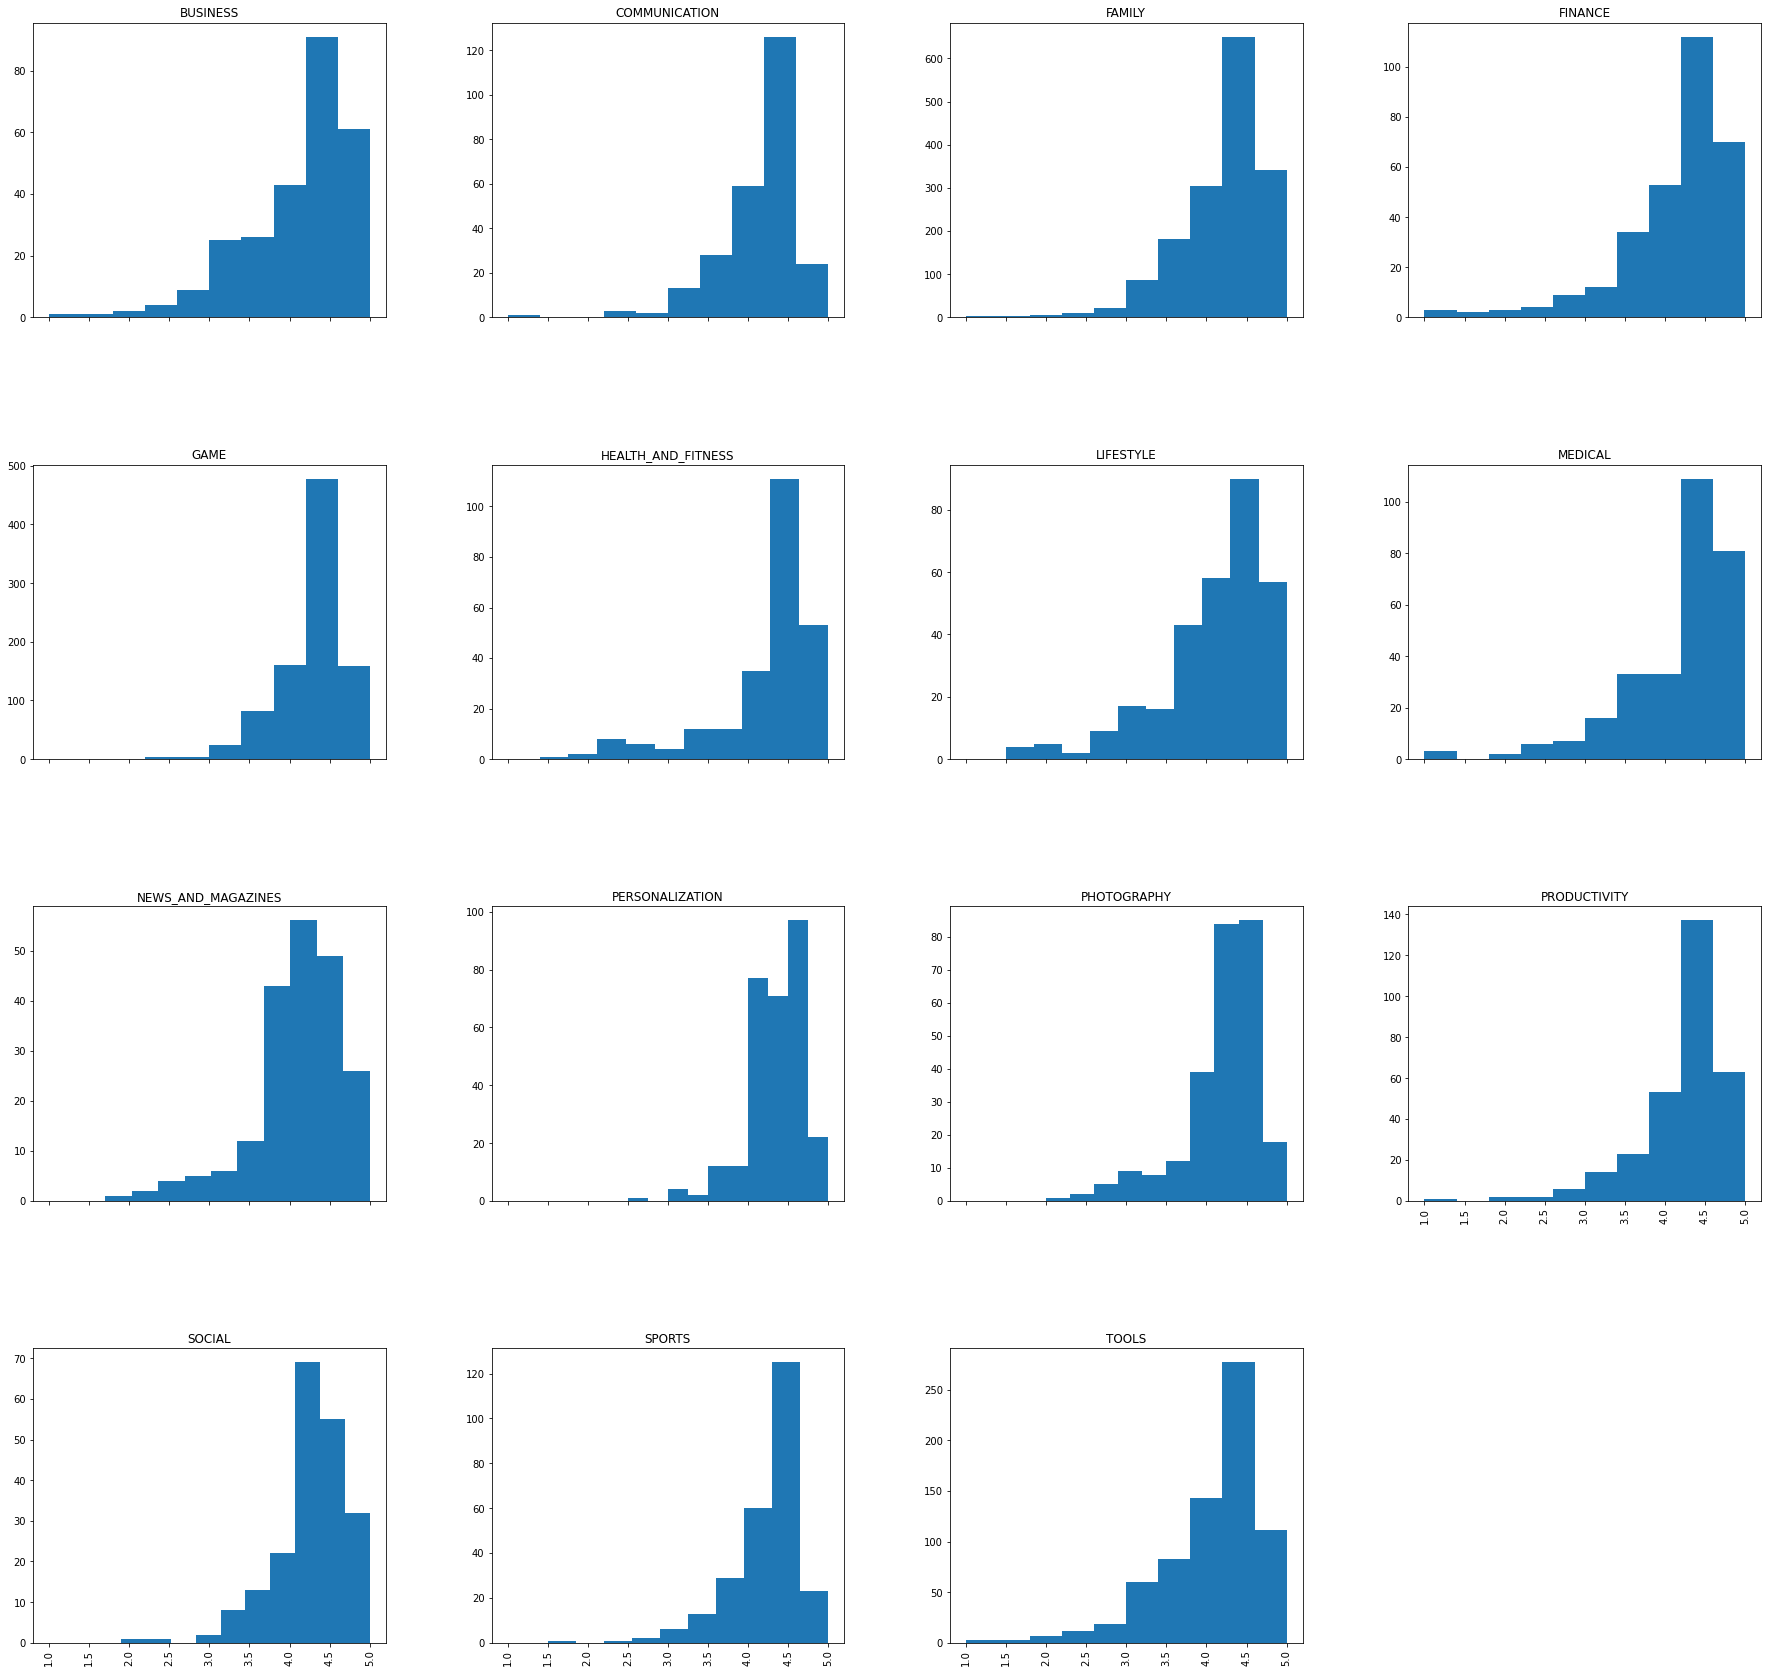

In [ ]:
top_categories = play_store.groupby("Category").filter(lambda x: len(x) > 200).reset_index()
array = top_categories['Rating'].hist(by=top_categories['Category'], sharex=True, figsize=(30,30))

In [ ]:
# Let's compare the categories with the rating using boxplot.

[Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'NEWS_AND_MAGAZINES')]

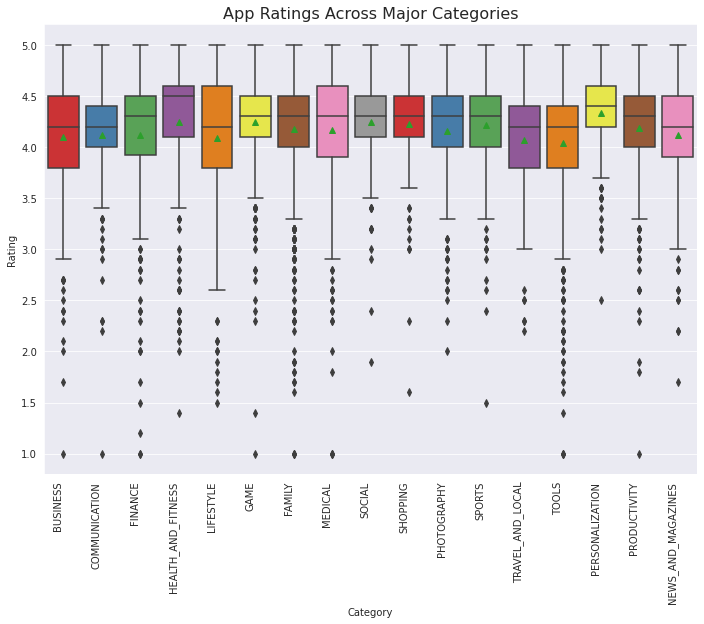

In [ ]:
topcat = play_store.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
topcat.head()
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("App Ratings Across Major Categories", fontsize=16)
ax = sns.boxplot(x='Category', y='Rating', data=topcat, palette='Set1', showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

## Content Rating v/s Rating

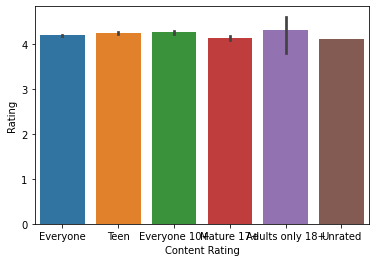

In [ ]:
#Compairing rating of all categories under content rating using barplot.
sns.barplot(x=play_store["Content Rating"], y=play_store["Rating"])
sns.set(rc={'figure.figsize':(9,6)})

## Comparision between paid and free apps.

In [ ]:
categoty_type_installs_df = play_store.groupby(['Category','Type'])[['Installs']].sum().unstack().reset_index()
categoty_type_installs_df = categoty_type_installs_df[~categoty_type_installs_df['Installs']['Paid'].isna()].set_index('Category')
categoty_type_installs_df

Installs            
Type                         Free        Paid
Category                                     
ART_AND_DESIGN       1.142171e+08     16000.0
AUTO_AND_VEHICLES    5.307980e+07     50000.0
BOOKS_AND_REFERENCE  1.665769e+09     22650.0
BUSINESS             6.968055e+08    212660.0
COMMUNICATION        1.103688e+10   1360000.0
DATING               1.409013e+08     11100.0
EDUCATION            3.522500e+08    602000.0
ENTERTAINMENT        2.113460e+09    200000.0
FAMILY               4.406833e+09  20646830.0
FINANCE              4.551268e+08    185600.0
FOOD_AND_DRINK       2.116178e+08     60000.0
GAME                 1.385776e+10  20999262.0
HEALTH_AND_FITNESS   1.143533e+09    473000.0
LIFESTYLE            5.025620e+08   1179110.0
MAPS_AND_NAVIGATION  5.031465e+08    121100.0
MEDICAL              3.759518e+07    557500.0
NEWS_AND_MAGAZINES   2.369105e+09      5500.0
PARENTING            3.106601e+07     50100.0
PERSONALIZATION      1.529094e+09   3258520.0
PHOTOGRAPHY          4.647265e+09   1878520.0
PRODUCTIVITY         5.791659e+09   1410810.0
SHOPPING             1.400321e+09     10100.0
SOCIAL               5.487835e+09      6000.0
SPORTS               1.095188e+09   1243800.0
TOOLS                7.997998e+09   1726820.0
TRAVEL_AND_LOCAL     2.894677e+09    182000.0
VIDEO_PLAYERS        3.926726e+09     71000.0
WEATHER              3.602850e+08    811500.0

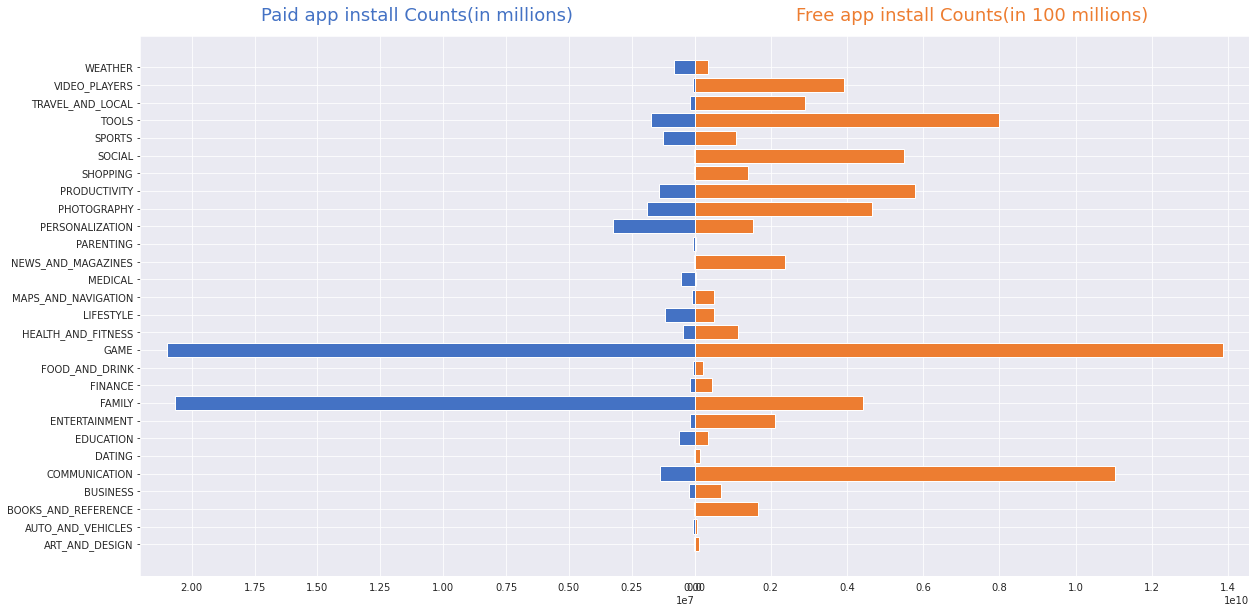

In [ ]:
ind = categoty_type_installs_df.index
column0 = categoty_type_installs_df['Installs']['Paid']
column1 = categoty_type_installs_df['Installs']['Free']
title0 = 'Paid app install Counts(in millions)'
title1 = 'Free app install Counts(in 100 millions)'

fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

## Paid apps v/s free apps on play store.


In [ ]:
# Calculating total number of paid and free apps.
play_store_df = play_store['Type'].value_counts()
play_store_df


Free    10039
Paid      800
0           1
Name: Type, dtype: int64

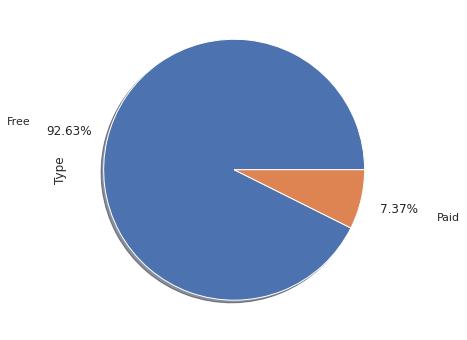

In [ ]:
play_store['Type'].value_counts().plot(kind='pie', explode=None, shadow=True,autopct='%1.2f%%', pctdistance=1.3, labeldistance=1.6)

## Rating given by different age categories.

In [ ]:
content_rating_df = play_store['Content Rating'].value_counts()
content_rating_df

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
content_rating_df = [go.Histogram(
        x = play_store['Content Rating'],
        xbins = {'start': 0.5, 'size': 1, 'end' :6})]
 
plotly.offline.iplot(content_rating_df, filename='Rating')

## Analysing sentiments

In [ ]:
#Analysing the nyumber of positive and negative sentiments in user review.
user_review_df = user_review['Sentiment'].value_counts()
user_review_df

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

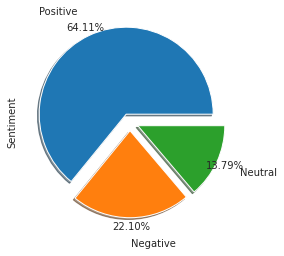

In [ ]:
user_review['Sentiment'].value_counts().plot(kind='pie', explode= (0.1,0.1,0.1), shadow=True,autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.3)

# ***Conclusions***
*  Average rating of apps on Google Play Store is {4.19}
* The Health and Fitness and Books and Reference produce the best apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating apps have a rating lower than the average.
*  All the categories under content rating is having 4+ plus which is good.
* People prefer to pay for the two category app (game and family).
*  GAME is the only category to have most number of installation in both paid and free category
* More than 92.63 percent of the apps on play store are free.
* TEEN contains the most values in the content rating with the total number of 912 values.
* More than 50% of the total sentiments are positive in the dataset user review.

